In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib.distributions import MultivariateNormalFullCovariance

D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [2]:
DNA_SIZE = 2         # parameter (solution) number
N_POP = 20           # population size
N_GENERATION = 100   # training step
LR = 0.02            # learning rate

In [3]:
def get_fitness(pred): return -((pred[:, 0])**2 + pred[:, 1]**2)

In [4]:
# 多变量分布
mean = tf.Variable(tf.random_normal([2,],13.,1.), dtype=tf.float32)
cov = tf.Variable(5.*tf.eye(DNA_SIZE), dtype=tf.float32)
mvn = MultivariateNormalFullCovariance(loc=mean, covariance_matrix=cov)
make_kid = mvn.sample(N_POP)

# 计算梯度，更新mean和conv
tfkids_fit = tf.placeholder(tf.float32, [N_POP,])
tfkids = tf.placeholder(tf.float32, [N_POP, DNA_SIZE])
loss = -tf.reduce_mean(mvn.log_prob(tfkids)*tfkids_fit)
train_op = tf.train.GradientDescentOptimizer(LR).minimize(loss)

W0729 20:59:16.938953  9292 deprecation.py:323] From <ipython-input-4-4e483ff3c584>:4: MultivariateNormalFullCovariance.__init__ (from tensorflow.contrib.distributions.python.ops.mvn_full_covariance) is deprecated and will be removed after 2018-10-01.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
W0729 20:59:16.940948  9292 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\contrib\distributions\python\ops\mvn_full_covariance.py:195: MultivariateNormalTriL.__init__ (from tensorflow.contrib.distributions.python.ops.mvn_tril) is deprecated and will be removed after 2018-10-01.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.dist

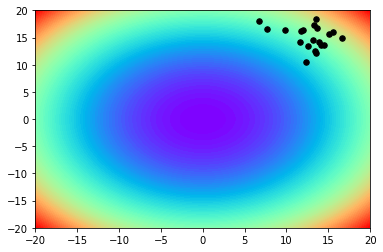

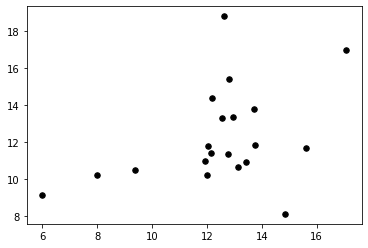

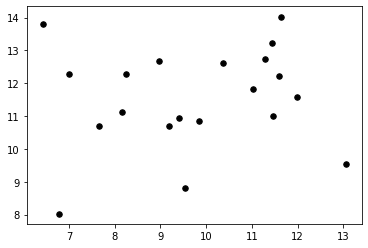

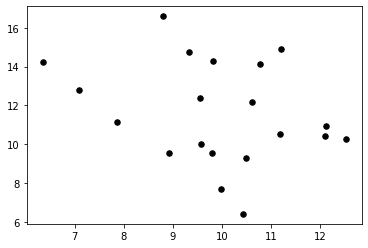

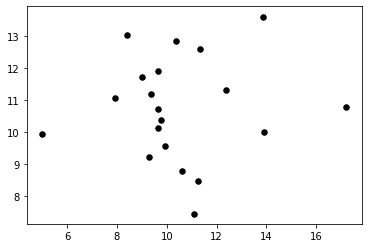

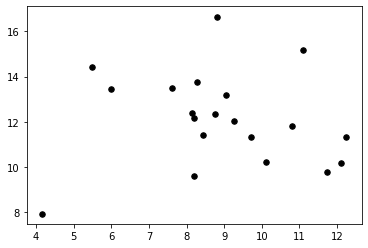

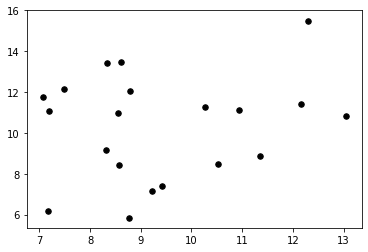

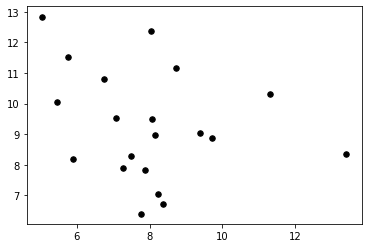

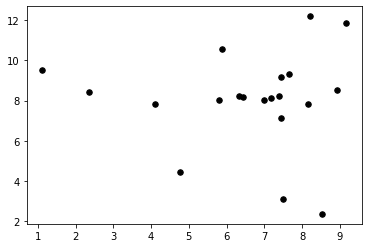

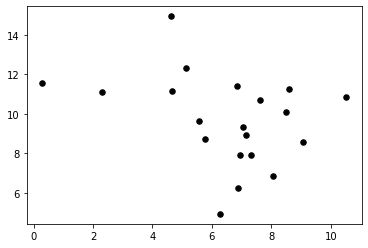

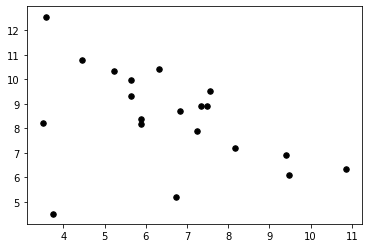

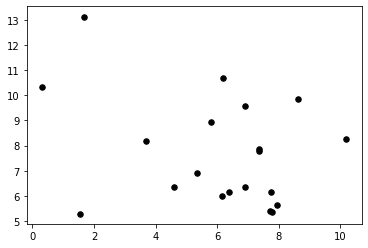

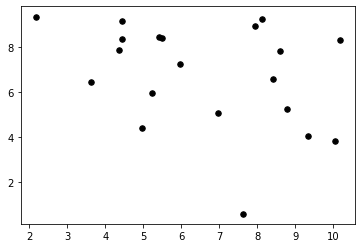

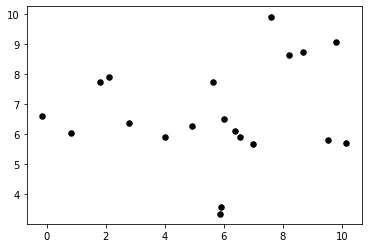

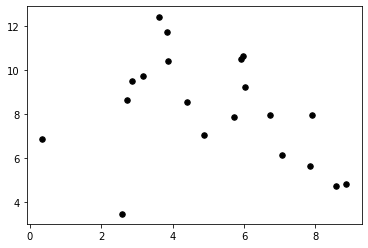

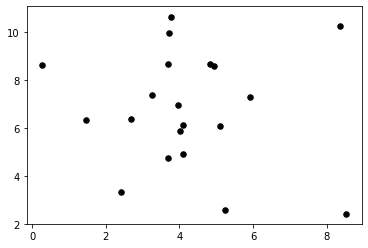

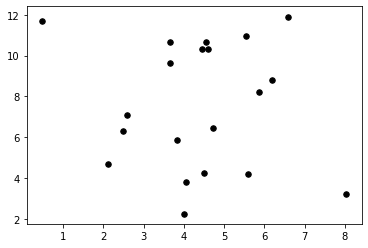

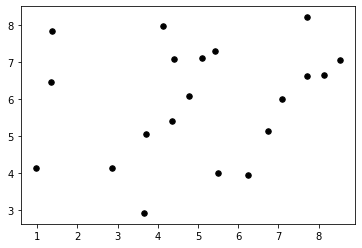

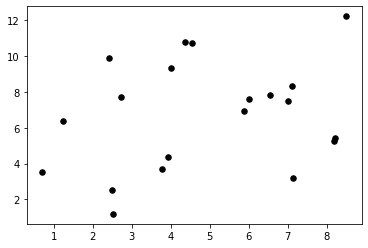

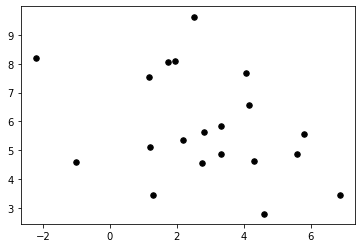

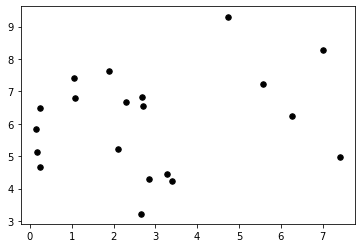

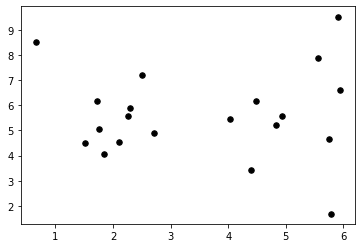

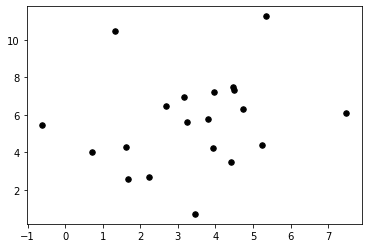

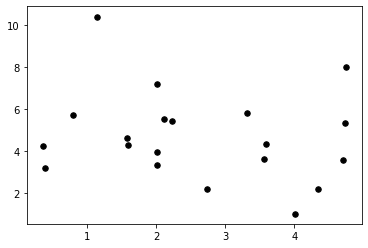

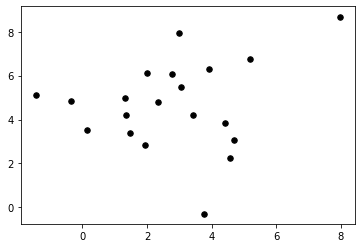

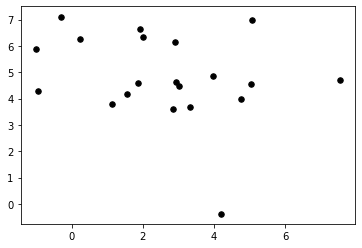

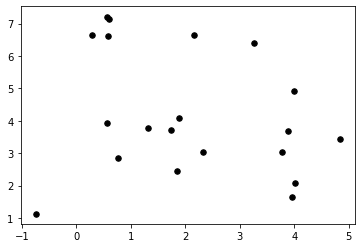

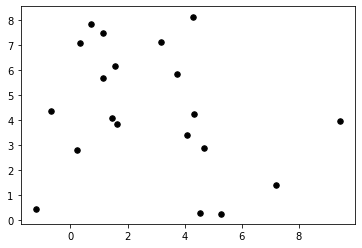

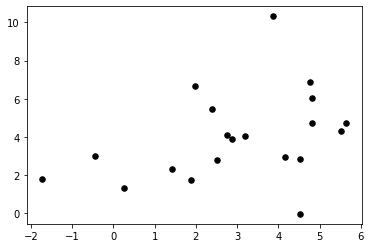

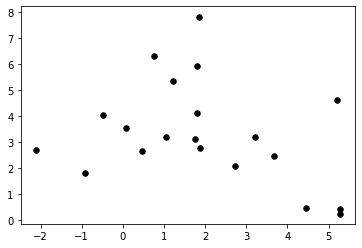

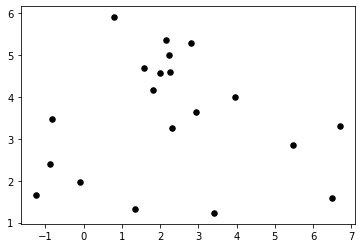

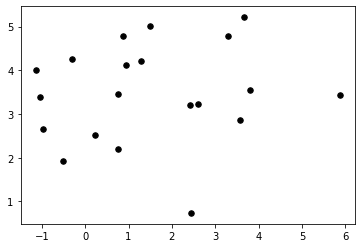

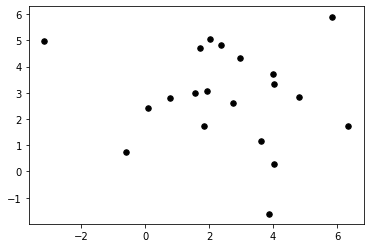

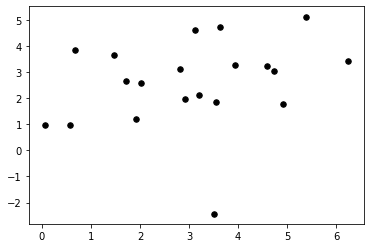

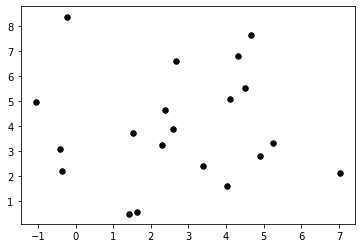

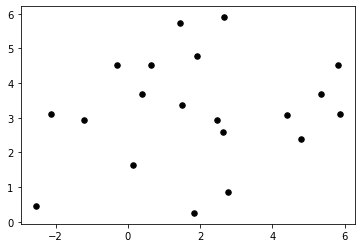

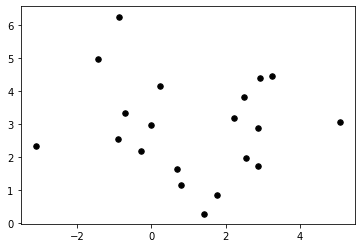

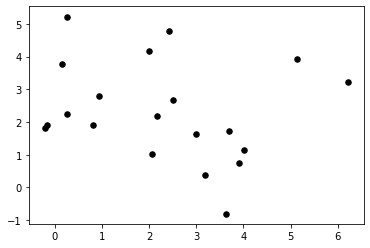

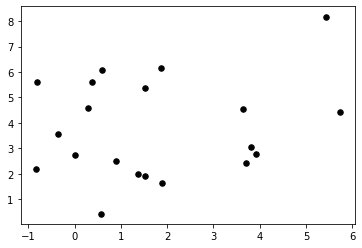

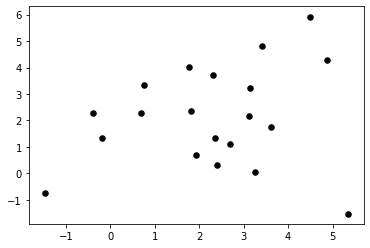

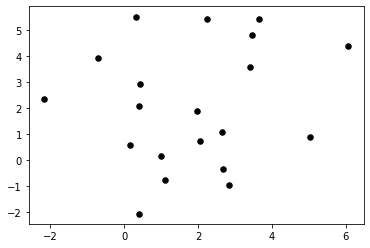

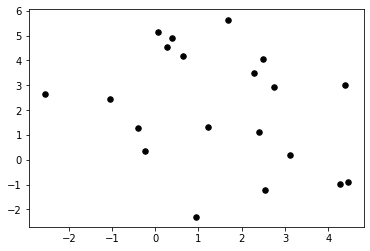

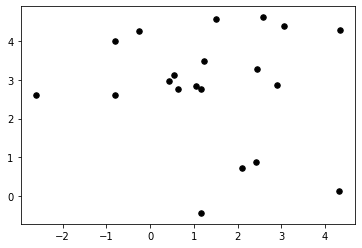

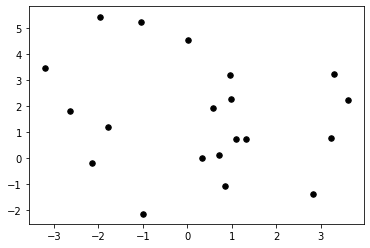

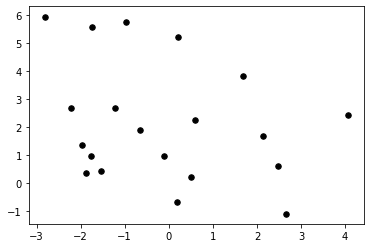

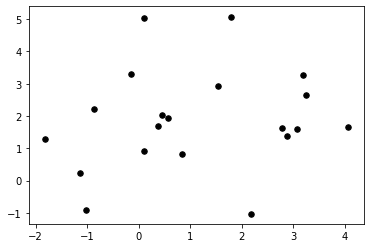

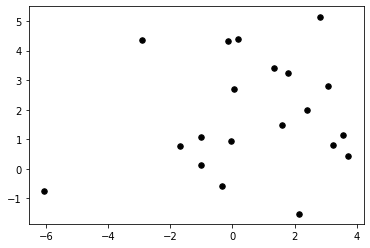

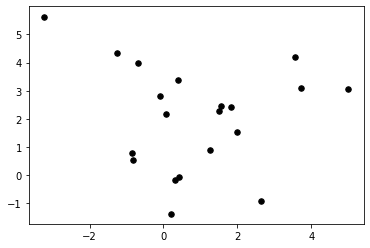

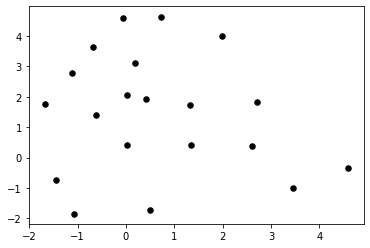

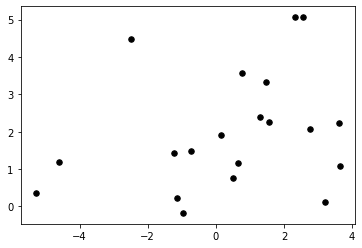

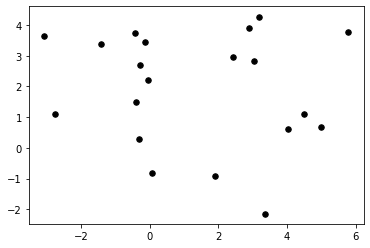

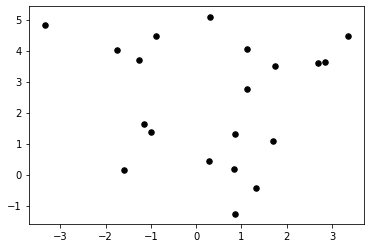

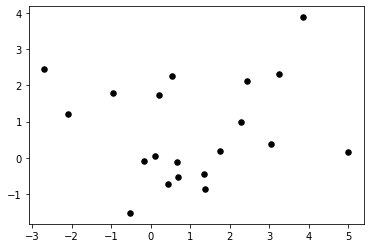

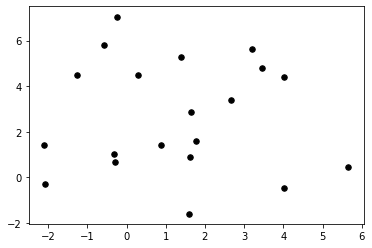

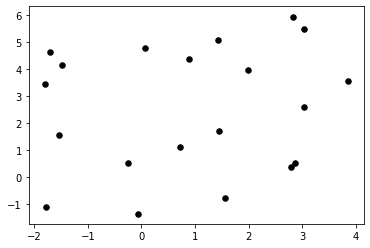

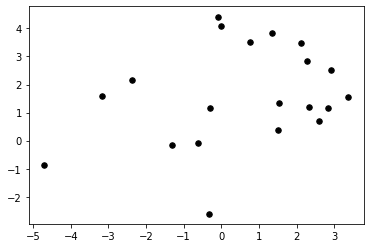

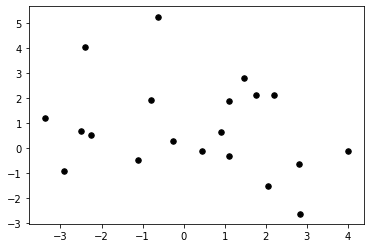

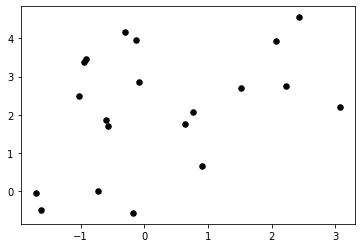

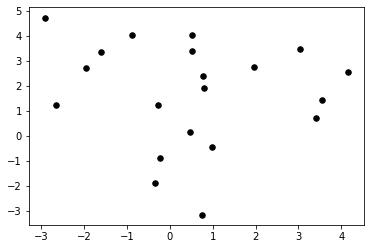

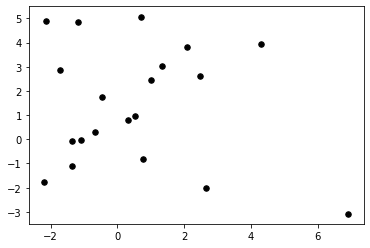

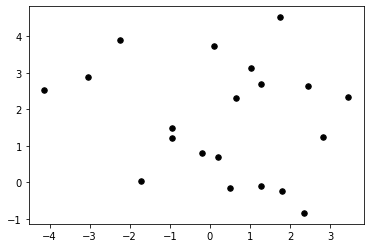

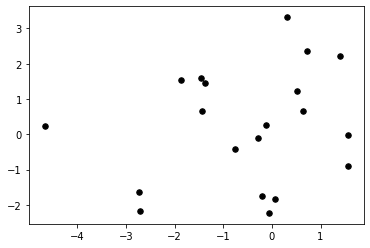

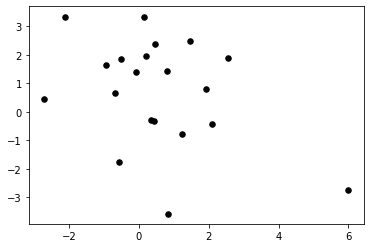

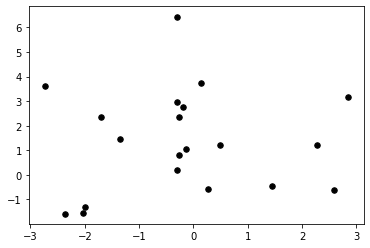

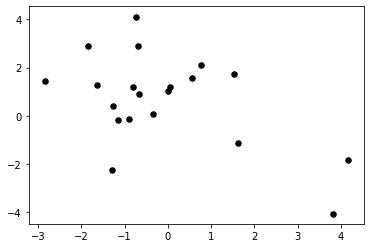

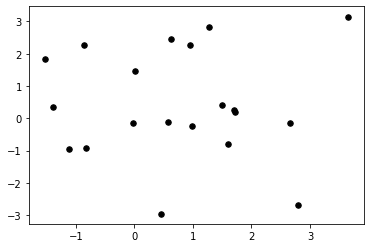

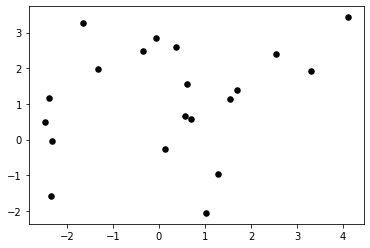

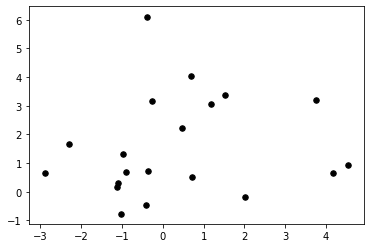

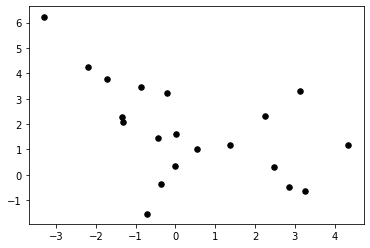

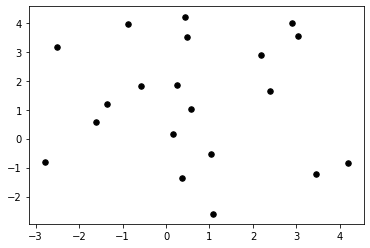

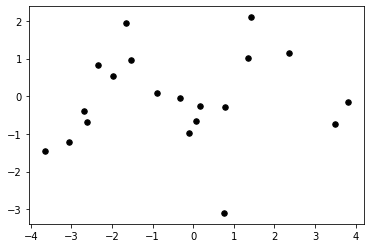

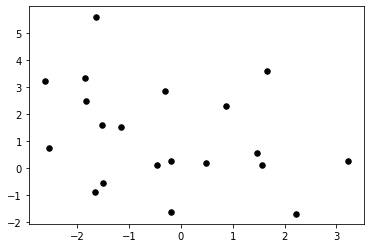

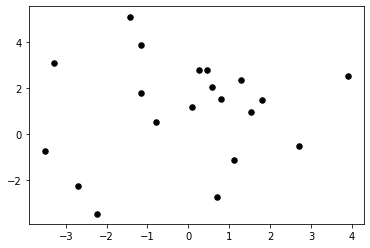

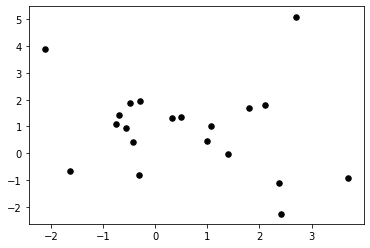

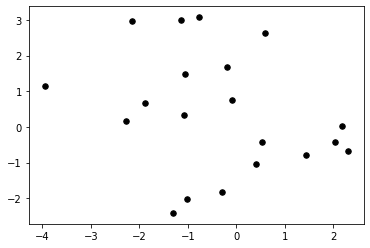

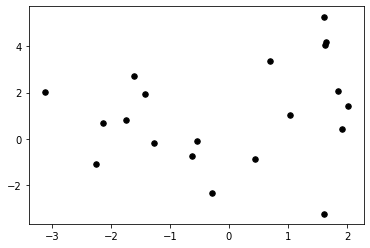

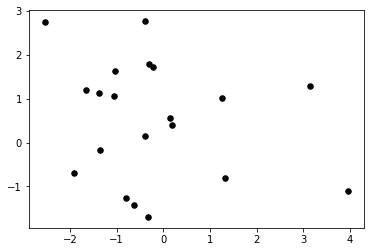

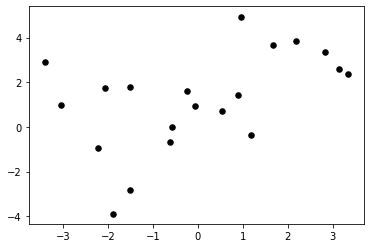

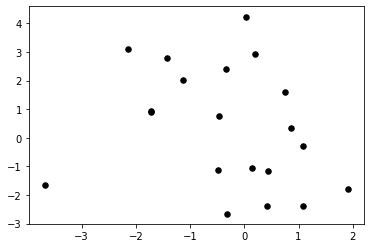

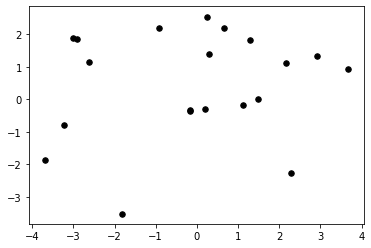

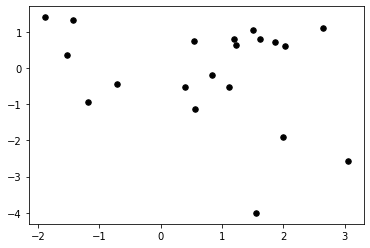

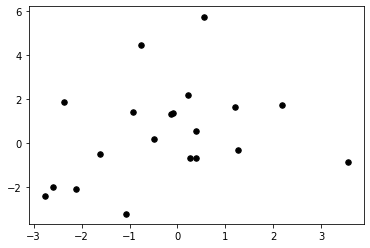

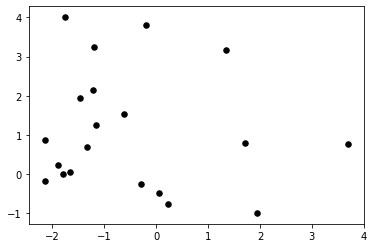

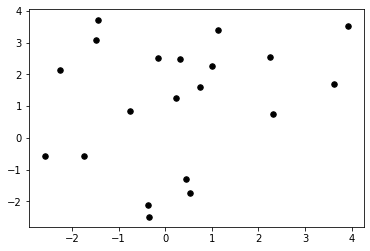

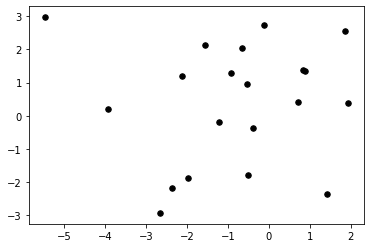

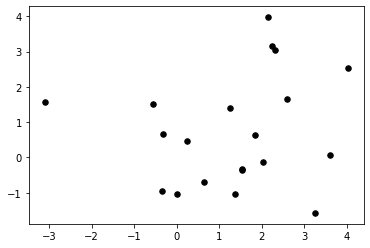

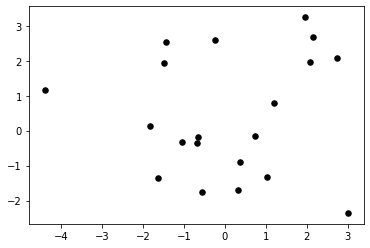

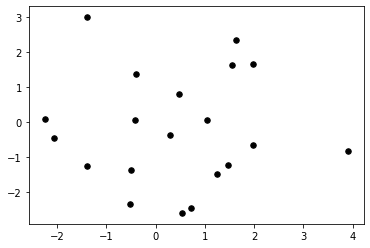

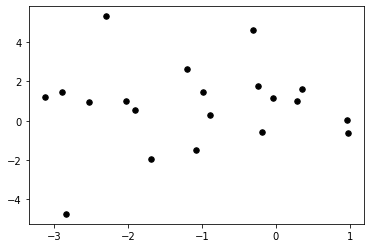

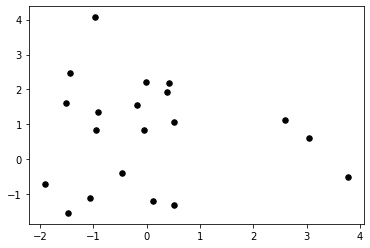

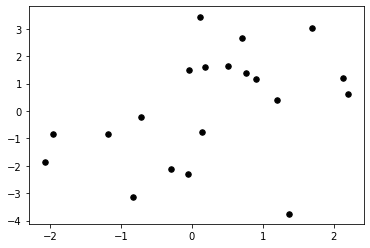

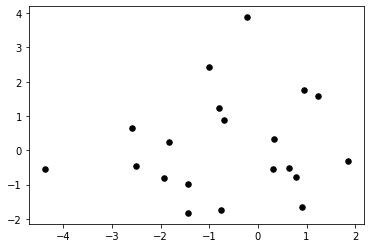

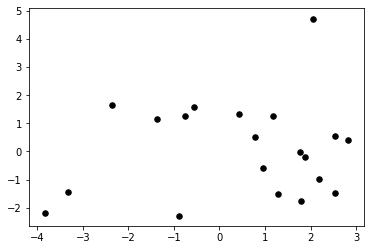

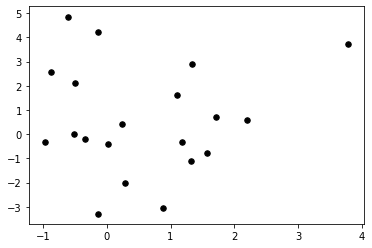

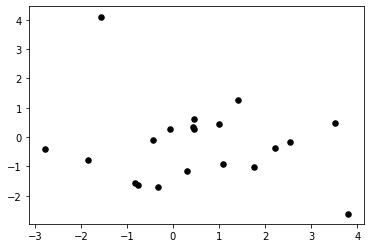

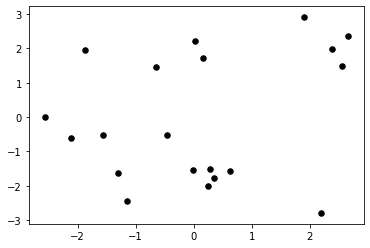

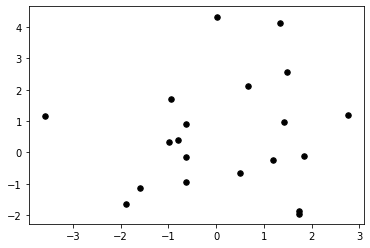

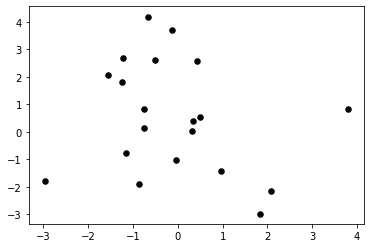

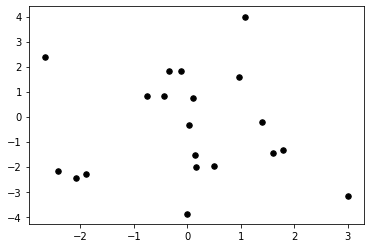

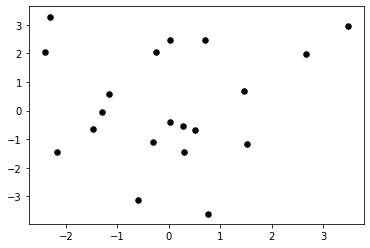

Finished


In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

n = 300
x = np.linspace(-20, 20, n)
X, Y = np.meshgrid(x, x)
Z = np.zeros_like(X)
for i in range(n):
    for j in range(n):
        Z[i, j] = get_fitness(np.array([[x[i], x[j]]]))
plt.contourf(X, Y, -Z, 100, cmap=plt.cm.rainbow)
plt.ylim(-20, 20)
plt.xlim(-20, 20)
plt.ion()

for g in range(N_GENERATION):
    kids = sess.run(make_kid)
    kids_fit = get_fitness(kids)
    sess.run(train_op, {tfkids_fit: kids_fit, tfkids: kids})
    
    # plotting update
    if 'sca' in globals(): 
        sca.remove()
    sca = plt.scatter(kids[:, 0], kids[:, 1], s=30, c='k')
    plt.pause(0.01)
    
print('Finished')
plt.ioff()
plt.show()